In [171]:
import matplotlib.pyplot as plt
import numpy as np
from perlin_noise import PerlinNoise
from scipy.integrate import solve_ivp

In [172]:
global Scale,AbunMatrix,Eta,Connec,Kappa,Abun0,mu0,mu1,D

In [173]:
def Arr2Posi(num,y):
    a=np.mod(y,num)
    b=int((y-a)/num)
    return [a,b]

In [174]:
def Posi2Arr(num,a,b):
    return a+b*num

In [175]:
def Dis(num,x,index):
    y=np.zeros(len(x))
    AA=Arr2Posi(num,index)
    for i in range(len(x)):
        BB=Arr2Posi(num,x[i])
        y[i]=np.sqrt((AA[0]-BB[0])**2+(AA[1]-BB[1])**2)
    return y

In [176]:
def Nearby(num,y):
    A=[]
    [a,b]=Arr2Posi(num,y)
    if a>0:
        A.append(Posi2Arr(num,a-1,b))
    if a<num-1:
        A.append(Posi2Arr(num,a+1,b))
    if b>0:
        A.append(Posi2Arr(num,a,b-1))
    if b<num-1:
        A.append(Posi2Arr(num,a,b+1))
    return A

In [177]:
def ARG_Move(t,y):
    dydt=np.zeros((Scale**2)*2)
    for i in range(Scale**2):
        aa=Arr2Posi(Scale,i)
        bb=Nearby(Scale,i)
        ss0=0
        ss1=0
        for j in range(len(bb)):
            ss0=ss0+y[bb[j]]
            ss1=ss1+y[bb[j]+Scale**2]
        if AbunMatrix[aa[0],aa[1]]==0:
            dydt[i]=0
            dydt[i+Scale**2]=0
        else:
            dydt[i]=mu0*y[i]*(1-(y[i]+y[i+Scale**2])/AbunMatrix[aa[0],aa[1]])-Eta*y[i]*(y[i+Scale**2]+Connec*ss1)+Kappa*y[i+Scale**2]-D*y[i]
            dydt[i+Scale**2]=mu1*y[i+Scale**2]*(1-(y[i]+y[i+Scale**2])/AbunMatrix[aa[0],aa[1]])+Eta*y[i]*(y[i+Scale**2]+Connec*ss1)-Kappa*y[i+Scale**2]-D*y[i+Scale**2]
    return dydt

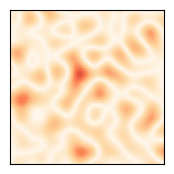

In [178]:
Scale=101
plt.figure(figsize=(2,2))
noise = PerlinNoise(octaves=6, seed=5)
xpix, ypix = Scale, Scale
pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]
land=(np.abs(pic))**1
land=0.001+(land-np.min(land))/(np.max(land)-np.min(land))*0.999
#xxxx=np.min(land[np.nonzero(land)])
#for fgh in range(Scale):
#    for jkl in range(Scale):
#        if land[fgh,jkl]==0:
#            land[fgh,jkl]=xxxx
AbunMatrix=land/np.sum(land)*Scale**2
plt.imshow(AbunMatrix, cmap='OrRd')
plt.clim(0,7)
plt.xticks([])
plt.yticks([])
plt.savefig('Landscape_ChangingEntropy_2_1.pdf')
plt.show()

In [179]:
Eta=0.08
Connec=0.04
Kappa=0.01
Abun0=0.01
mu0=0.5
mu1=0.45
D=0.02
Center=int((Scale-1)/2)
InitialM=np.zeros((Scale,Scale))
InitialM[Center,Center]=Abun0*AbunMatrix[Center,Center]
Initial=np.concatenate((AbunMatrix.flatten(),InitialM.flatten()),axis=0)
timespan=np.arange(0,800,1)
sol=solve_ivp(ARG_Move,[0,max(timespan)],Initial,method='RK23',t_eval=timespan)
y1=sol.y

0
1
2
3


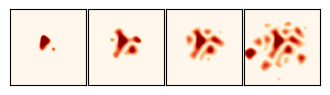

In [185]:
tpoints=[0.2,0.4,0.6,0.8]
plt.figure(figsize=(4,2))
for j in range(len(tpoints)):
    print(j)
    tpoint=int(tpoints[j]*np.size(y1,1))-1
    Plasmid=y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint]
    #Plasmid=np.divide(y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint],y1[np.arange(0,(Scale**2),1),tpoint]+y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint])
    PlasmidM=np.zeros((Scale,Scale))
    for i in range(len(Plasmid)):
        aa=Arr2Posi(Scale,i)
        PlasmidM[aa[0],aa[1]]=Plasmid[i]
    plt.subplot(1,len(tpoints),j+1)
    plt.imshow(PlasmidM, cmap='OrRd')
    plt.clim(0,3)
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=0.03)
plt.savefig('Landscape_ChangingEntropy_2_2.pdf')
plt.show()

0
1
2
3


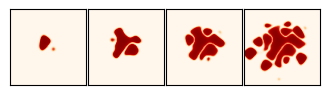

In [186]:
tpoints=[0.2,0.4,0.6,0.8]
plt.figure(figsize=(4,2))
for j in range(len(tpoints)):
    print(j)
    tpoint=int(tpoints[j]*np.size(y1,1))-1
    #Plasmid=y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint]
    Plasmid=np.divide(y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint],y1[np.arange(0,(Scale**2),1),tpoint]+y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint])
    PlasmidM=np.zeros((Scale,Scale))
    for i in range(len(Plasmid)):
        aa=Arr2Posi(Scale,i)
        PlasmidM[aa[0],aa[1]]=Plasmid[i]
    plt.subplot(1,len(tpoints),j+1)
    plt.imshow(PlasmidM, cmap='OrRd')
    plt.clim(0,1)
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=0.03)
plt.savefig('Landscape_ChangingEntropy_2_3.pdf')
plt.show()